In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv("FashionDataset.csv")

#### The dataset is loaded into pandas dataframe

In [3]:
df.head(7)

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
5,5,kraus,wide ankle length cotton womens jeans - light ...,"Size:26,28,30,32,34",Rs\n1795,1615,10% off,Westernwear-Women
6,6,life,printed cotton blend collared womens regular d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1299,649,50% off,Westernwear-Women


In [4]:
df.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


<p> <b> We can see that the columns Sizes, MRP, Selling prices and Discounts are of dtype object </b></p>

In [6]:
df.shape

(30758, 8)

<p> <b> <i> There are 30758 records and 8 features in the given dataset  </i></b></p>

### 1. Data Cleaning process

<h4> (a) The first column doesn't have any significance, hence can be removed </h4>

In [7]:
df.drop(columns=['Unnamed: 0'], inplace = True)

<h4> (b) Replace 'Size:', 'Rs\n' and '% off' in the columns 'Sizes' , 'MRP' and 'Discount' respectively </h4>

In [8]:
df['Sizes'] = df['Sizes'].str.replace('Size:',' ')

In [9]:
df['MRP'] = df['MRP'].str.replace('Rs\n',' ')

In [10]:
df['Discount'] = df['Discount'].str.replace('% off',' ')

<h4> (c) Correct the spelling of Details column and change other column names </h4>

In [11]:
df.rename(columns = {'Deatils':'Details', 'Discount':'Discount in %', 'MRP':'MRP in Rs','SellPrice':'SellPrice in Rs'}, inplace = True)

In [12]:
df.head()

,BrandName,Details,Sizes,MRP in Rs,SellPrice in Rs,Discount in %,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women


<h4> (d) Handling null values</h4>

In [13]:
df.isnull().sum()

BrandName          0
Details            0
Sizes              0
MRP in Rs          0
SellPrice in Rs    0
Discount in %      0
Category           0
dtype: int64

In [14]:
df.replace(to_replace = 'Nan', value = np.nan, inplace=True)

In [15]:
df.isnull().sum()

BrandName          1183
Details            1183
Sizes              7501
MRP in Rs          8208
SellPrice in Rs    1183
Discount in %      8208
Category              0
dtype: int64

<h4> (e) Ploting the null values </h4>

<Axes: >

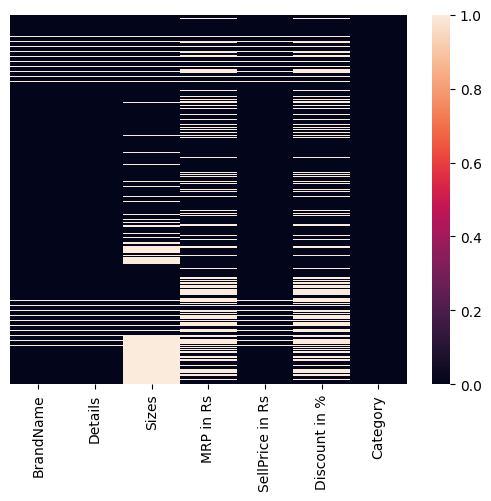

In [16]:
sns.heatmap(df.isnull(), vmin = 0,vmax = 1, yticklabels = False)

<h4> (f) Droping the Nan values from BrandName </h4>

In [17]:
df.drop(df.loc[df['BrandName'].isnull()].index, inplace = True)

In [18]:
df.isnull().sum()

BrandName             0
Details               0
Sizes              6318
MRP in Rs          7025
SellPrice in Rs       0
Discount in %      7025
Category              0
dtype: int64

<Axes: >

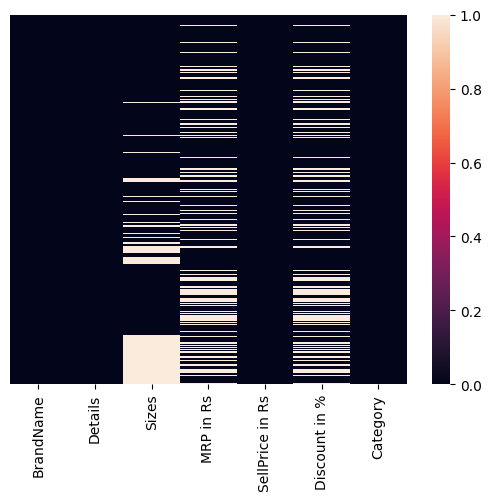

In [19]:
sns.heatmap(df.isnull(), vmin = 0,vmax = 1, yticklabels = False)

In [20]:
df.isnull().sum()

BrandName             0
Details               0
Sizes              6318
MRP in Rs          7025
SellPrice in Rs       0
Discount in %      7025
Category              0
dtype: int64

<h4> (g) Handling the MRP Nan values by using the mean MRP price of each Brand </h4>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29575 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BrandName        29575 non-null  object
 1   Details          29575 non-null  object
 2   Sizes            23257 non-null  object
 3   MRP in Rs        22550 non-null  object
 4   SellPrice in Rs  29575 non-null  object
 5   Discount in %    22550 non-null  object
 6   Category         29575 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


<h5> (i) Converting object types to float64 </h5>

In [22]:
df['MRP in Rs'] = df['MRP in Rs'].astype(np.float64)
df['SellPrice in Rs'] = df['SellPrice in Rs'].astype(np.float64)
df['Discount in %'] = df['Discount in %'].astype(np.float64)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29575 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BrandName        29575 non-null  object 
 1   Details          29575 non-null  object 
 2   Sizes            23257 non-null  object 
 3   MRP in Rs        22550 non-null  float64
 4   SellPrice in Rs  29575 non-null  float64
 5   Discount in %    22550 non-null  float64
 6   Category         29575 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.8+ MB


In [24]:
df['MRP in Rs'] = df.groupby('BrandName', group_keys=False)['MRP in Rs'].apply(lambda x: x.fillna(x.mean()))
df['Discount in %'] = df.groupby('BrandName', group_keys=False)['Discount in %'].apply(lambda x: x.fillna(x.mean()))

In [25]:
df.isnull().sum()   

BrandName             0
Details               0
Sizes              6318
MRP in Rs          2188
SellPrice in Rs       0
Discount in %      2188
Category              0
dtype: int64

<p> <i>""NULL values in MRP and Discount persists even after filling with mean values w.r.t brands,<br>
this shows there are Brands with no MRP and discount values in the table""
 </i></p>

<h5> (ii) These MRP are replaced with selling price </h5>

In [26]:
df['MRP in Rs'] = df.apply(lambda x: x['SellPrice in Rs'] if pd.isnull(x['MRP in Rs']) else x['MRP in Rs'], axis=1)
df['Discount in %']  = df.apply(lambda x: 0 if pd.isnull(x['Discount in %']) else x['Discount in %'], axis=1)

In [27]:
df.isnull().sum()   

BrandName             0
Details               0
Sizes              6318
MRP in Rs             0
SellPrice in Rs       0
Discount in %         0
Category              0
dtype: int64

### 2. Exploratory Data Analysis

In [28]:
# min and max MRP range of each brand


Brand_list = list(df.BrandName.value_counts().index)

MRP_dict = {}
count = 0
for brand in Brand_list:
    if count< 10:
        temp_mrp = df.loc[df.BrandName == brand ,'MRP in Rs']
        count+=1
        MRP_dict.update({brand:[int(temp_mrp.min()),int(temp_mrp.max())]})

mrp_keys = []
mrp_values = []

for k,v in MRP_dict.items():
    mrp_keys.extend(list(itertools.repeat(k,len(v))))
    mrp_values.extend(v)

In [29]:
# min and max Selling price range of each brand

Sell_dict = {}
count = 0
for brand in Brand_list:
    if count< 10:
        temp_sell = df.loc[df.BrandName == brand ,'SellPrice in Rs']
        count+=1
        Sell_dict.update({brand:[int(temp_sell.min()),int(temp_sell.max())]})
        
sell_keys = []
sell_values = []

for k,v in Sell_dict.items():
    sell_keys.extend(list(itertools.repeat(k,len(v))))
    sell_values.extend(v)

In [30]:
# Maximum Selling price of each brand

count = 0
Sell_max = {}
for brand in Brand_list:
        if count<10:
            temp_sellm = df.loc[df.BrandName == brand ,'SellPrice in Rs']
            Sell_max.update({brand:temp_sellm.max()})
            count+=1

sell_maxkey = list(Sell_max.keys())
sell_maxvalues = list(Sell_max.values())

Text(0.5, 1.0, 'MRP range of top 10 brands with their maximum selling price')

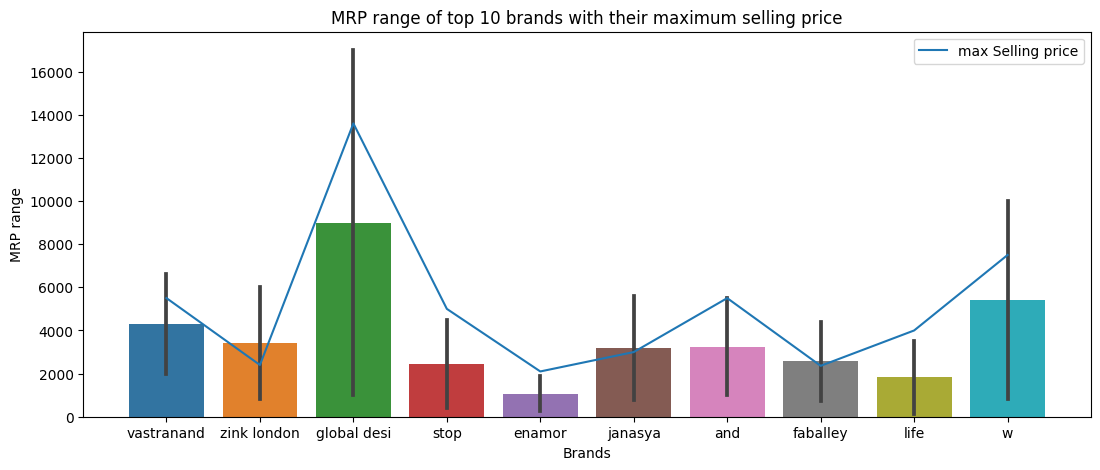

In [31]:
plt.figure(figsize = (13,5))
sns.barplot(x = mrp_keys,y = mrp_values)
plt.plot(sell_maxvalues, label = 'max Selling price')
plt.xlabel('Brands')
plt.ylabel('MRP range')
plt.legend(loc = 'best')
plt.title('MRP range of top 10 brands with their maximum selling price')

### Inference from the graph : Though some brands have selling price higher than the MRP, most of the brands selling their products in a discounted rate

Text(0.5, 1.0, 'Selling price range of top 10 brands')

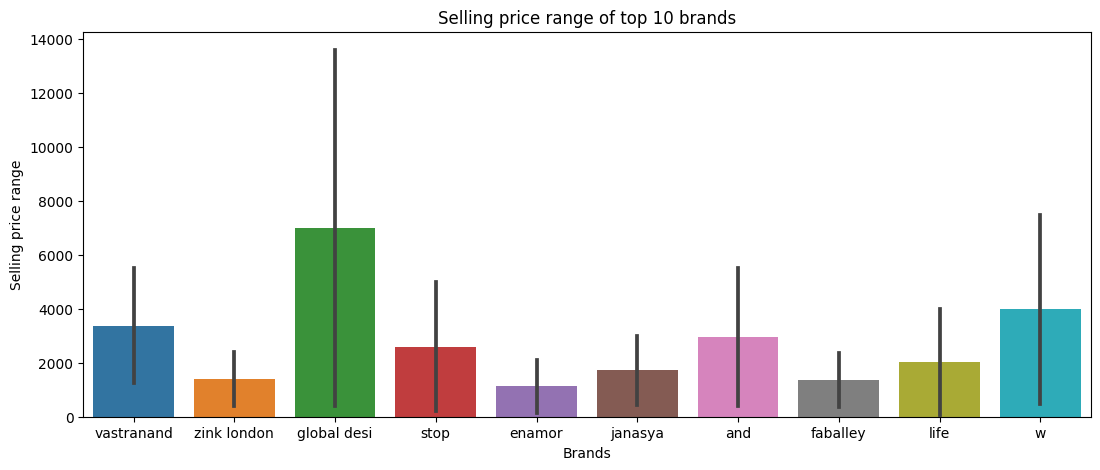

In [32]:
plt.figure(figsize = (13,5))
sns.barplot(x = sell_keys,y = sell_values)
plt.xlabel('Brands')
plt.ylabel('Selling price range')
plt.title('Selling price range of top 10 brands')

Text(0.5, 1.0, 'Market share of top 10 brands')

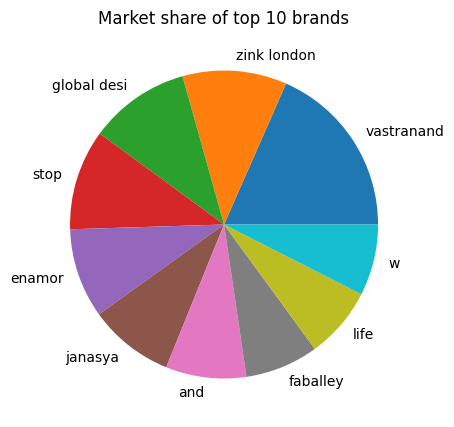

In [33]:
top_10 = list(df['BrandName'].value_counts().nlargest(10))
plt.figure(3, figsize = (5,5))
plt.pie(top_10, labels = list(df['BrandName'].value_counts().index)[:10])
plt.title('Market share of top 10 brands')

In [34]:
df.head()

,BrandName,Details,Sizes,MRP in Rs,SellPrice in Rs,Discount in %,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699.0,849.0,50.0,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499.0,2449.0,30.0,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199.0,599.0,50.0,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299.0,1379.0,40.0,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699.0,849.0,50.0,Westernwear-Women


In [35]:
cat_ind = list(df['Category'].value_counts().index)
cat_val = list(df['Category'].value_counts().values)

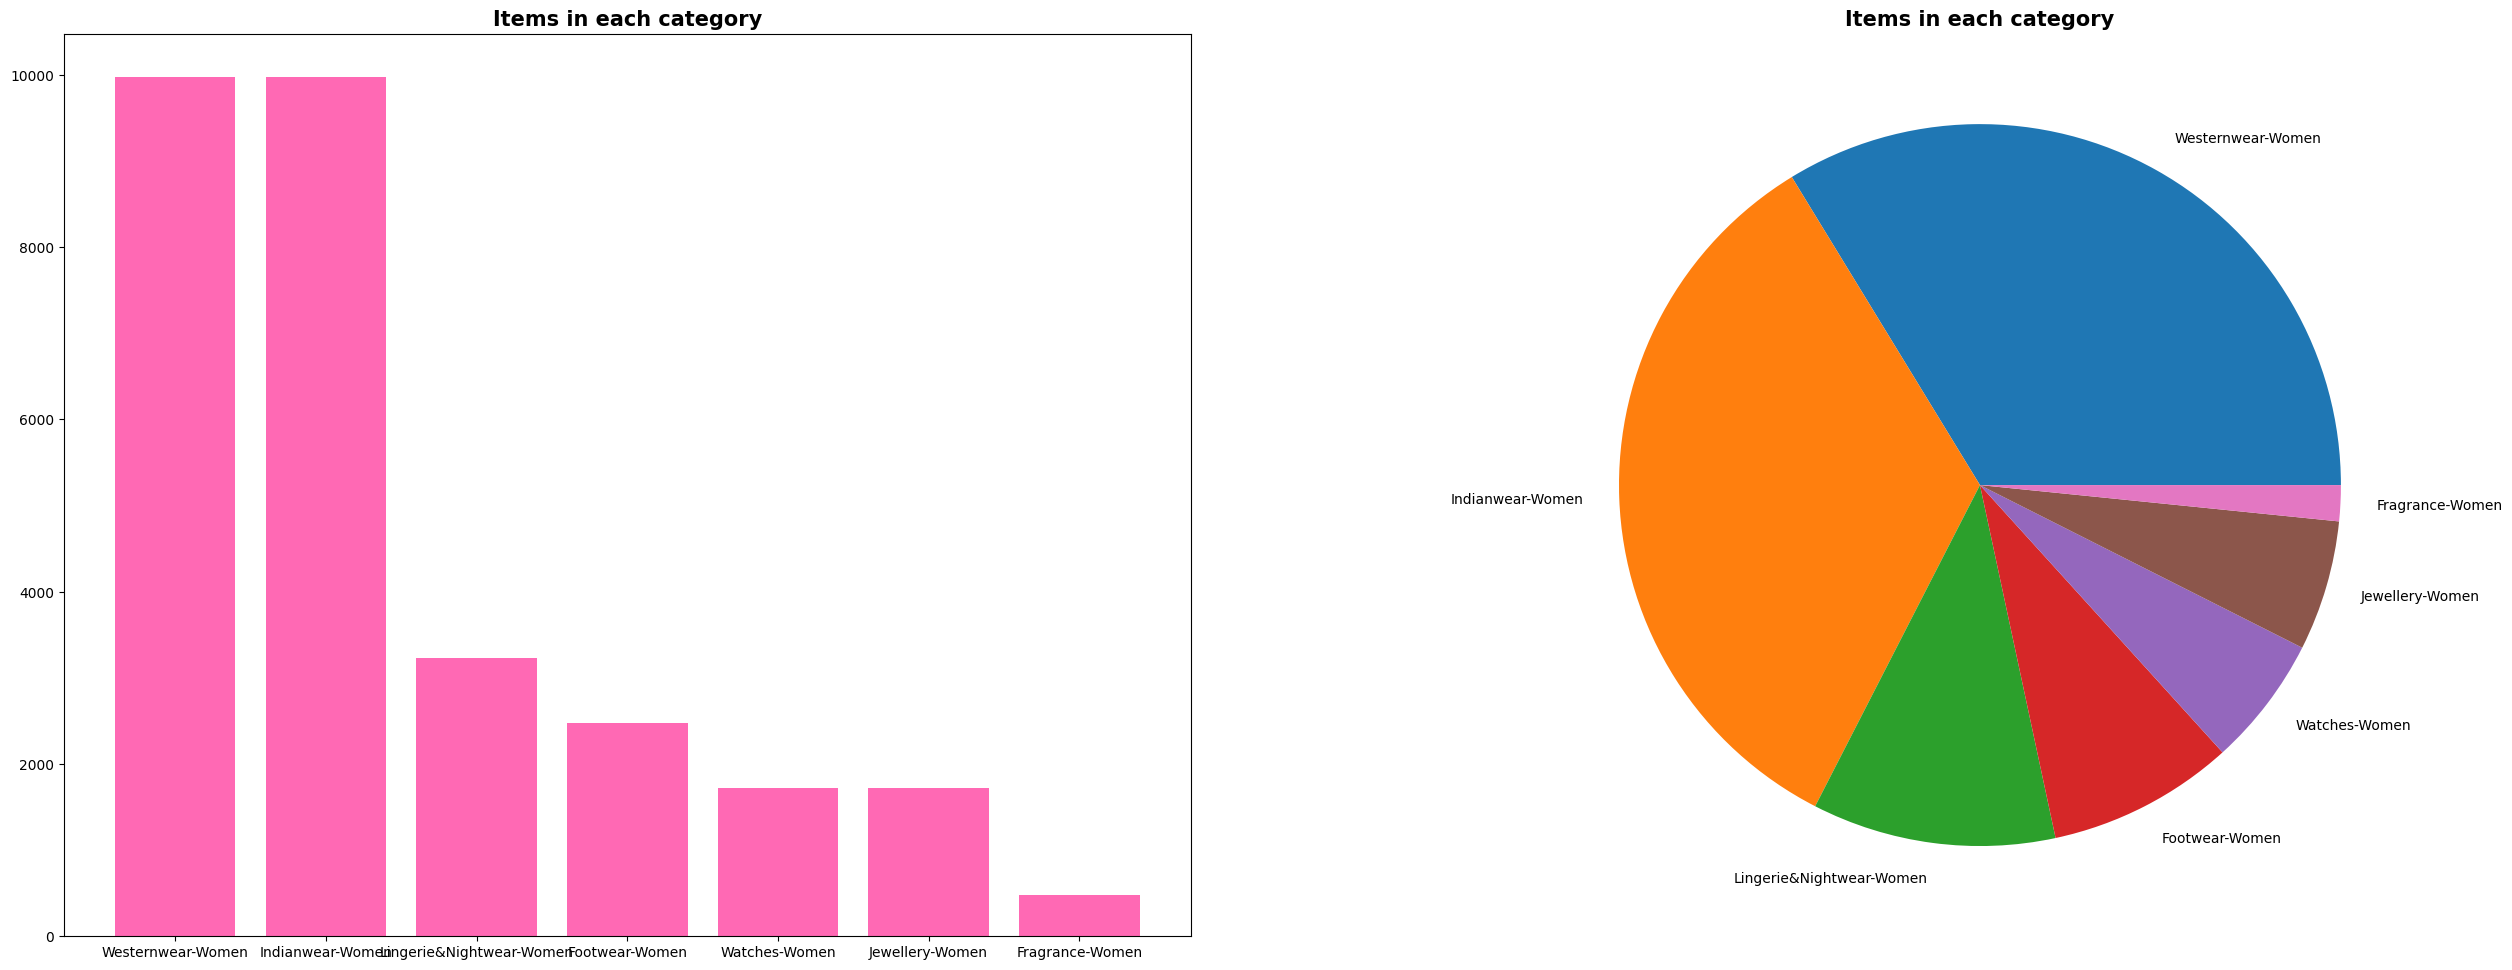

In [36]:
plt.figure(4)
plt.subplot(121)
plt.bar(cat_ind, cat_val, color = 'hotpink')
plt.title('Items in each category',fontsize = 15, fontweight = "bold", loc = "center")
plt.subplot(122)
plt.pie(cat_val, labels = cat_ind)
plt.title('Items in each category',fontsize = 15, fontweight = "bold", loc = "center")

plt.subplots_adjust(left=None, bottom=-1, right=4, top=None, wspace=None, hspace=None)

### Inference: Western-wear , Indian-wear, Lingerie & Night wear are the most sold Categories

<h5> Top brands for each of the most sold Categories </h5>

In [37]:
df_cat = df.groupby(['Category','BrandName']).size().reset_index().rename(columns = {0:'Items'})
cat_list = list(df['Category'].value_counts().index)
print(cat_list)

['Westernwear-Women', 'Indianwear-Women', 'Lingerie&Nightwear-Women', 'Footwear-Women', 'Watches-Women', 'Jewellery-Women', 'Fragrance-Women']


In [38]:
# Dictionary of different categories with their top brands

brand_cat = {}
val_brand = []
for cat in cat_list:
    itms = df_cat.loc[df_cat['Category'] == cat,'Items']
    idx = itms.nlargest(10).index.tolist()
    val = itms.nlargest(10).tolist()
    brand = df_cat.loc[idx,'BrandName']
    val_brand.append(val)
    brand_cat.update({cat:brand.tolist()})

<h5> Visulaizing categories with their top brands </h5>

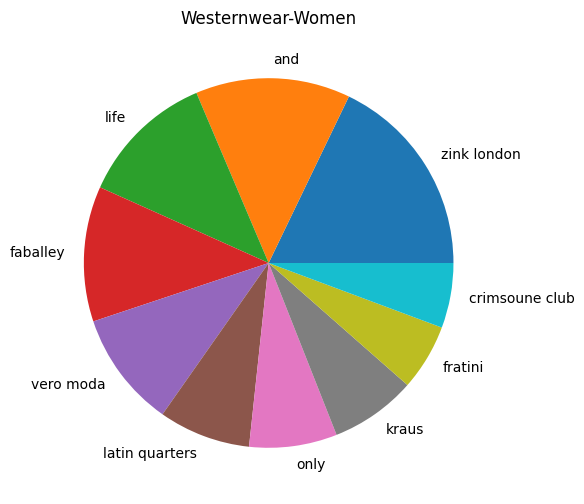

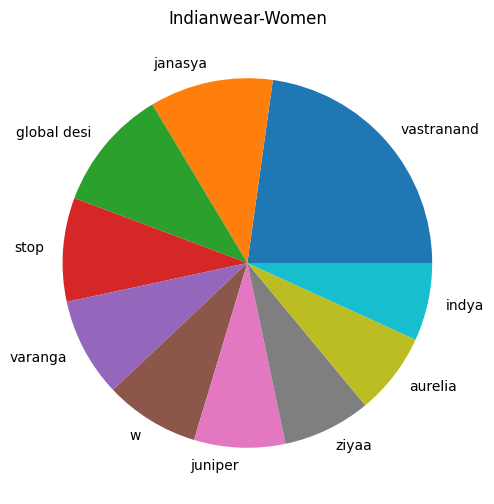

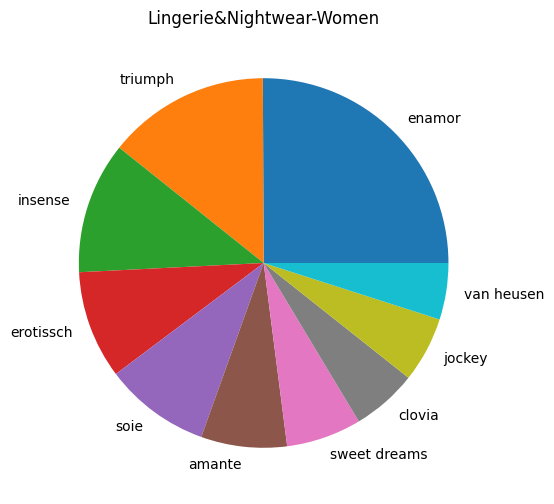

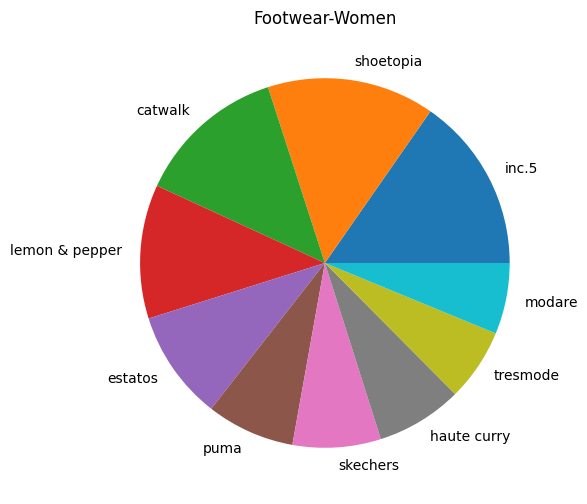

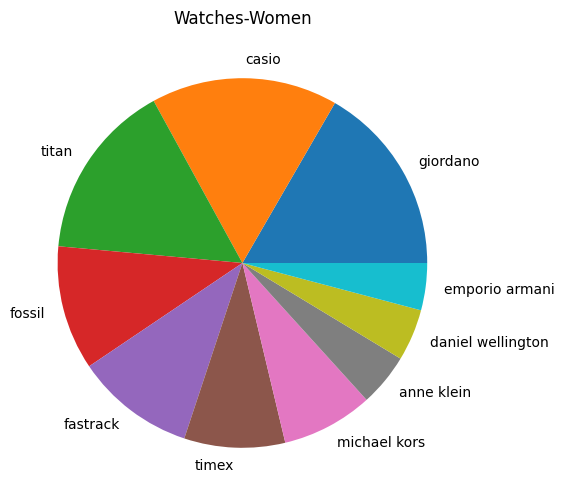

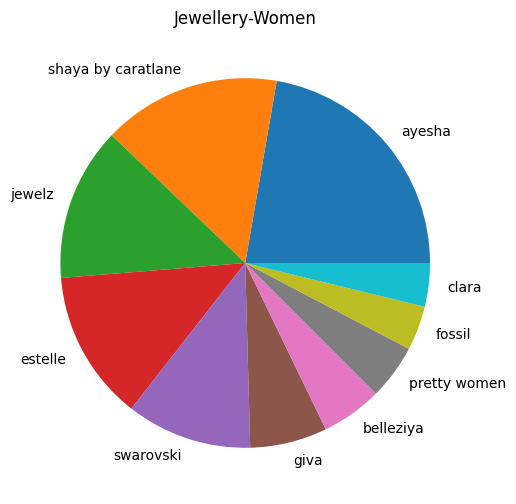

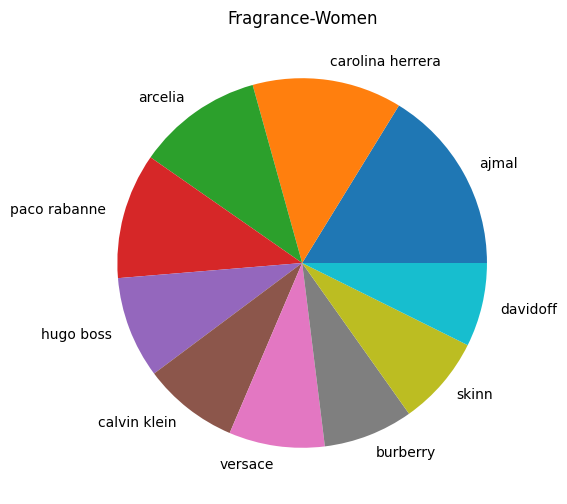

In [39]:
brand_x = []
cat_name = []
for k,v in brand_cat.items():
    brand_x.append(v)
    cat_name.append(k)
    
c = 0
for i in range(len(brand_x)):
    plt.figure(c, figsize = (6,6))
    plt.pie(val_brand[i], labels = brand_x[i])
    plt.title(cat_name[i])
    c+=1

### Popular brands for each of the categories have been captured in the above pie charts

<h5>The function returns the brand name along with the cheapest and the highest price in the Category</h5>

In [40]:
def cheap_costly(num,cat_type):
    df_sell = df.groupby(['Category','SellPrice in Rs','BrandName']).size().reset_index()
    min_price = df_sell.loc[df_sell['Category'] == cat_type, 'SellPrice in Rs'].nsmallest(num)
    min_idx = min_price.index.tolist()
    max_price = df_sell.loc[df_sell['Category'] == cat_type, 'SellPrice in Rs'].nlargest(num)
    max_idx = max_price.index.tolist()

    brand_min = df_sell.loc[min_idx,'BrandName'].tolist()
    brand_max = df_sell.loc[max_idx,'BrandName'].tolist()
    maxp = max_price.tolist()
    minp = min_price.tolist()

    mini = dict(zip(minp,brand_min))
    maxi = dict(zip(maxp,brand_max))
    
    return (mini,maxi)

In [41]:
cheap_costly(2,'Footwear-Women')

({249.0: 'flipside', 295.0: 'estatos'}, {10999.0: 'puma', 9999.0: 'adidas'})

### The above function helps the customer to identify the brand based on the budget or vice versa

In [42]:
df.to_excel('cleaned.xlsx')